# Tensorflow에서 데이터 사용하기: tf.data.Dataset, tensorflow_datasets

#### - Library import

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
tf.__version__

'2.0.0'

#### - List the available datasets in tensorflow_datasets

In [3]:
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'eraser_multi_rc',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'gr

### ▶ tfds.builder 함수, tfds.load 함수: tf.data.Dataset 구축 기능 제공

#### - tfds.builder 사용
   - split: train, test 데이터셋 선택

In [4]:
imdb_builder = tfds.builder("imdb_reviews")
imdb_builder.download_and_prepare()
imdb_train = imdb_builder.as_dataset(split="train")
imdb_test = imdb_builder.as_dataset(split="test")

#### - 데이터 정보

In [5]:
imdb_info = imdb_builder.info

In [6]:
imdb_info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(), dtype=tf.string),
})

#### - tfds.load 사용
   - with_info: info 같이 load 할지에 대한 여부
   - as_supervised
       - True: tf.data.Dataset 2-tuple structure
       - False: tf.data.Dataset dictionary

In [7]:
imdb_ds, imdb_info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
imdb_train, imdb_test = imdb_ds['train'], imdb_ds['test']

#### - 데이터 정보

In [8]:
imdb_info.features

FeaturesDict({
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    'text': Text(shape=(None,), dtype=tf.int64, encoder=<SubwordTextEncoder vocab_size=8185>),
})

#### - Subword encoder

In [9]:
encoder = imdb_info.features['text'].encoder

In [10]:
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [11]:
encoder.vocab_size

8185

#### - Subword encoding

In [12]:
sample_string = 'Hello TensorFlow.'

In [13]:
encoded_string = encoder.encode(sample_string)

In [14]:
'Encoded string is {}'.format(encoded_string)

'Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]'

#### - Subword decoding

In [15]:
original_string = encoder.decode(encoded_string)

In [16]:
'The original string: "{}"'.format(original_string)

'The original string: "Hello TensorFlow."'

In [17]:
for index in encoded_string:
    print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


#### - take
   - 인자로 입력된 수만큼 데이터 불러오기

In [18]:
for ex in imdb_train.take(2):
#     print(ex)
#     print(ex['label'])
#     print(ex['text'])
    print(ex[0])
    print(ex[1])

tf.Tensor(
[  62   18   41  604  927   65    3  644 7968   21   35 5096   36   11
   43 2948 5240  102   50  681 7862 1244    3 3266   29  122  640    2
   26   14  279  438   35   79  349  384   11 1991    3  492   79  122
  188  117   33 4047 4531   14   65 7968    8 1819 3947    3   62   27
    9   41  577 5044 2629 2552 7193 7961 3642    3   19  107 3903  225
   85  198   72    1 1512  738 2347  102 6245    8   85  308   79 6936
 7961   23 4981 8044    3 6429 7961 1141 1335 1848 4848   55 3601 4217
 8050    2    5   59 3831 1484 8040 7974  174 5773   22 5240  102   18
  247   26    4 3903 1612 3902  291   11    4   27   13   18 4092 4008
 7961    6  119  213 2774    3   12  258 2306   13   91   29  171   52
  229    2 1245 5790  995 7968    8   52 2948 5240 8039 7968    8   74
 1249    3   12  117 2438 1369  192   39 7975], shape=(163,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int64)
tf.Tensor(
[  12   31   93  867    7 1256 6585 7961  421  365    2   26   14    9
  988 1089    7

### ▶ Input pipelines

#### - batch
   - 인자로 입력된 batch size로 데이터 구성
   - batch size로 데이터 구성 후 take 함수 사용시 batch size가 기본 단위로 변경

#### - padded_batch
   - batch with padding
   - padded_shapes: padding size (None or integer)

In [19]:
BATCH_SIZE = 2

In [20]:
# batch_imdb_train = imdb_train.repeat().shuffle(1024).batch(BATCH_SIZE)

- padded_shapes = None
   - maximum length of all elments in that dimension

In [21]:
batch_imdb_train = imdb_train.repeat().shuffle(1024).padded_batch(BATCH_SIZE, padded_shapes=([None],[]))

In [22]:
for ex in batch_imdb_train.take(2):
    print(ex[0])
    print(ex[1])
    # pad size
    print(ex[0][0].shape)
    print(ex[0][1].shape)
    print()

tf.Tensor(
[[2960 7978 7976  391 3840 7961  234 4412 1412  597   12  258   33 4863
  7961   22    1  315   13   14    9   41 1301 6334 7961  489   20   63
  6477   31 2699  104    2   15  180   35 1893 8029    2   20   15  241
     7 7291   49   11  143 8010 1365 5182 2248    8 5716 7961  706 8044
     3  468    2   14   18    4   27   20    4 1234   13   12   18    4
  3182 2603 7961 5002  127  234  137 5098   11  683  338   13   15   18
   126   23 1515    2   12 1728   15   25    4 6288 7961 4249 8044    3
    19   98    9    6 1133   25 1265  895 2243 4726   41 4627 7809 7961
  1944    2    5 1520  447  630  576 7974 7968 8039 7974 6298 7961   23
  3224   22 3961    8  178   20 7809 1846    8    5  108 4205  991 4978
     2   20 1609  351 2639    5 2062  101 6094 7961 1265  895 2243 2995
  8044    3  156   12   80 1515    2   14  600    9    4   32   12   70
   490    5   92  161 1750  179    2   20    1 7809 7961 1944 7961 1647
   514   40  105   72   12   18 2554    2    5   12  

- padded_shapes = int
   - the component will be padded out to that length in that dimension.

In [23]:
batch_imdb_train = imdb_train.repeat().shuffle(1024).padded_batch(BATCH_SIZE, padded_shapes=([700],[]))

In [24]:
for ex in batch_imdb_train.take(2):
    print(ex[0])
    print(ex[1])
    # pad size
    print(ex[0][0].shape)
    print(ex[0][1].shape)
    print()

tf.Tensor(
[[6347 7961 2568 ...    0    0    0]
 [6072 6143 5814 ...    0    0    0]], shape=(2, 700), dtype=int64)
tf.Tensor([0 1], shape=(2,), dtype=int64)
(700,)
(700,)

tf.Tensor(
[[7732    9   81 ...    0    0    0]
 [2080 1551    2 ...    0    0    0]], shape=(2, 700), dtype=int64)
tf.Tensor([0 0], shape=(2,), dtype=int64)
(700,)
(700,)



### ▶ Data example visualization

In [25]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
mnist_train = mnist_builder.as_dataset(split="train")

In [26]:
mnist_info = mnist_builder.info

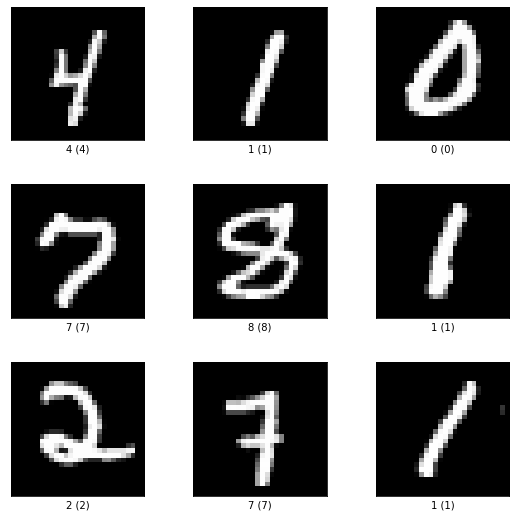

In [28]:
from matplotlib import pyplot as plt

fig = tfds.show_examples(mnist_info, mnist_train)